## **4.2 Google Colab - Algoritmos de mejoramiento de imágenes usando operaciones morfológicas**

Los ejercicios que deben agregarse a este proyecto serán las siguientes:

1.   Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab.

2.   Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab.

3.   Investigar una aplicación de opening y closing e implementalo en Google Colab.













# **Names and IDs of team members:**

**Nombre Matrícula**

Félix Daniel Reyes López A01794458

Dante Cesar Cervantes Gutierrez A01794585

Ruben Guerrero del Fierro A01793005

Juan Manuel Carballo Montaño A01166758

# **Importing Libraries**

In [1]:
import math
import cv2
import cv2 as cv
import cupy as cp
import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# **Loading images from Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/ComputerVision/Activities/4.2"
os.chdir(DIR)

# **Actividad 1. Erosion**

Explicacion por lineas:

Se carga la imagen en formato GRAYSCALE, posteriormente se pasa a formato binario invertido.

Se crearon 2 kernels con tamano distinto (3 y 5) para encontrar sus variaciones una vez que la imagen es procesada.

Aplicamos erosion a la misma imagen con cada uno de los kernels.

A traves de un for se muestran las imagenes.

**Resultados:**


*   Kerner tamano 3 tiene un cambio minimo
*   Kernel tamano 5 mejora pero tambien desvanece parte de la imagen ue no se busca afectar.







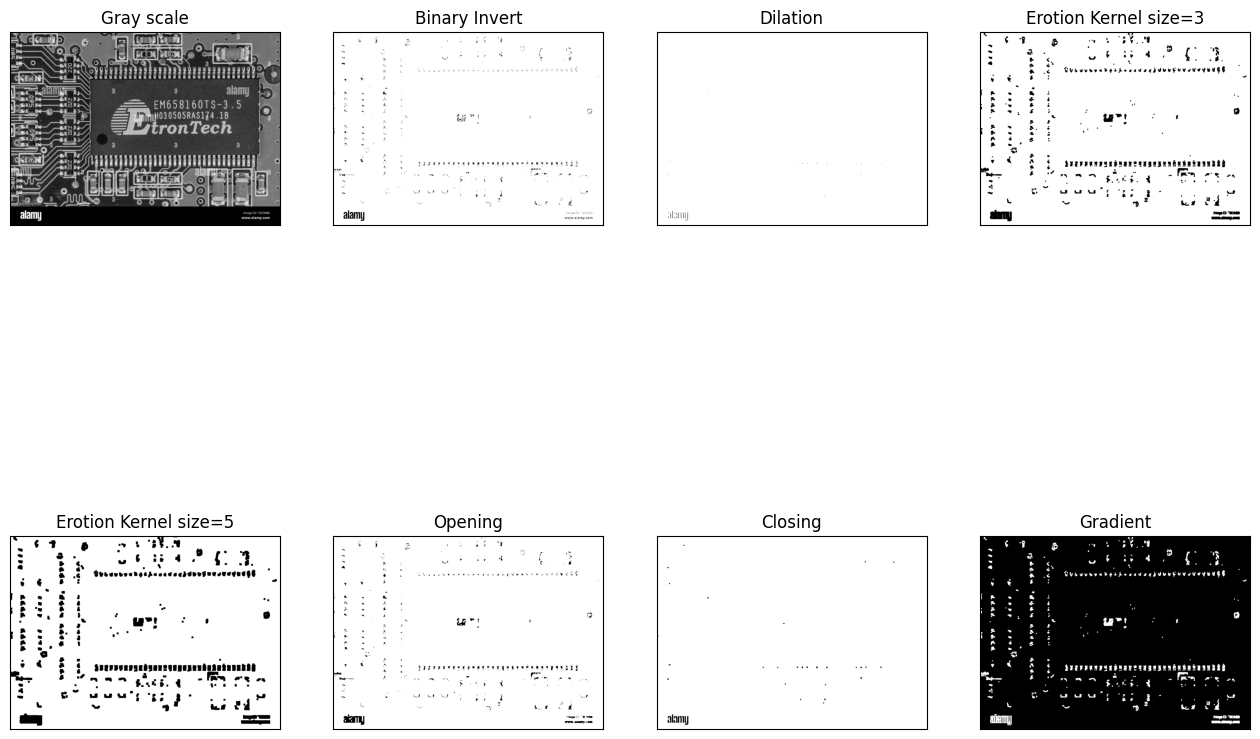

In [4]:
img = cv2.imread('Images/smt.jpg', cv2.IMREAD_GRAYSCALE)
_, binaryIm = cv2.threshold(img, 220,255, cv2.THRESH_BINARY_INV)

kernal3 = np.ones((3,3), np.uint)
kernal5 = np.ones((5,5), np.uint)

dilationK3 =  cv2.dilate(binaryIm, kernal3, iterations= 2)
erotionK3 = cv2.erode(binaryIm, kernal3, iterations= 2)
erotionK3 = cv2.erode(binaryIm, kernal3, iterations= 2)
erotionK5 = cv2.erode(binaryIm, kernal5, iterations= 2)
opening = cv2.morphologyEx(binaryIm, cv2.MORPH_OPEN, kernal5)
closing = cv2.morphologyEx(binaryIm, cv2.MORPH_CLOSE, kernal5)
gradient = cv2.morphologyEx(binaryIm, cv2.MORPH_GRADIENT, kernal5)


# Opening is Erosion follows by Dilation
# Closing is Dilation follows by Erosion
# Gradient is the difference between Dilation and Erotion
titles = ['Gray scale', 'Binary Invert', 'Dilation' ,'Erotion Kernel size=3', 'Erotion Kernel size=5', 'Opening', 'Closing', 'Gradient']
images = [img, binaryIm, dilationK3, erotionK3, erotionK5, opening, closing, gradient]

plt.figure(figsize=(16, 12))
for i in range(len(images)):
  plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
  plt.title(titles[i])
  plt.xticks([]), plt.yticks([])

plt.show()

# **Actividad 2. Dilatacion**

La funcion Dilation es util para crecer o hacer más grueso los objetos en una imagen binaria.

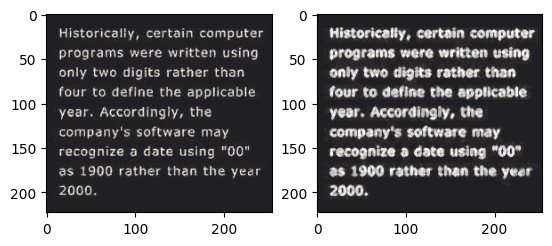

In [5]:
img_text = cv2.imread('Images/text.bmp')

dilation_shape = cv.MORPH_ELLIPSE
dilation_size = 1

se = cv.getStructuringElement(dilation_shape, (2 * dilation_size + 1, 2 * dilation_size + 1), (dilation_size, dilation_size))

img_dilated = cv2.dilate(img_text, se)

fig, axes = plt.subplots(1,2)

axes[0].imshow(img_text)
axes[1].imshow(img_dilated)

# **Actividad 3a. Opening**

La funcion Opening es util para el mejoramiento del fondo de las iamgenes, porque ayuda a remover el ruido o manchas de fondo pero mantiene la forma de la figuras sin alterarlas, es funcion es muy util para imagenes dañadas o con ruido de fondo.

A continuación se aplicara a una imagen con un fondo con ruido, el cual, al incrementar el tamaño del kernel, el fondo se homogeneiza al negro sin distorsionar la forma de las esferas:

(-0.5, 383.5, 283.5, -0.5)

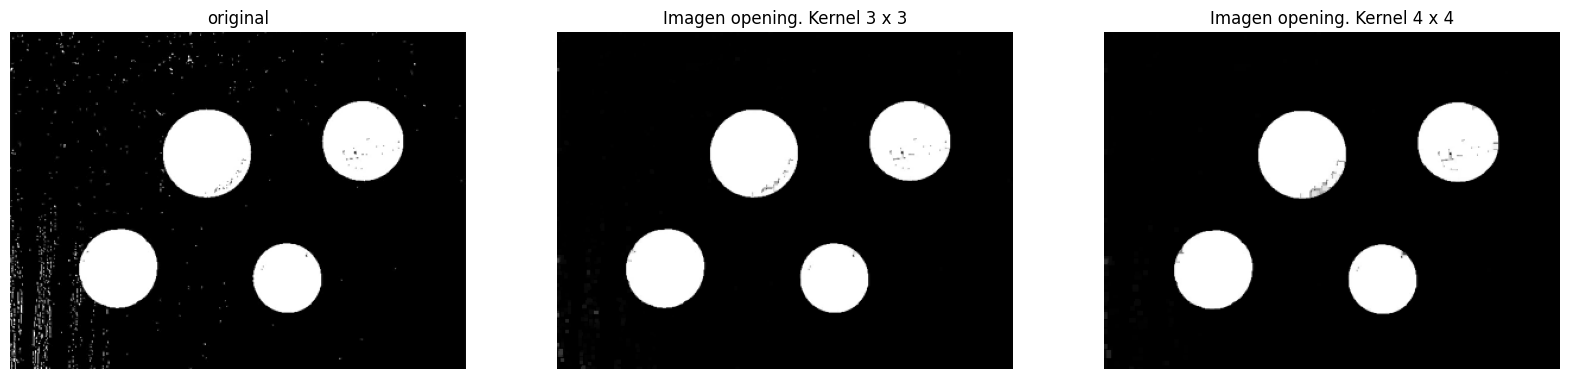

In [6]:
img_esferas = cv2.imread('Images/esferas.png', 1)

fig0, ((ax0,ax1, ax2)) = plt.subplots(nrows=1, ncols=3, figsize=(20, 9))
ax0.imshow(cv2.cvtColor(img_esferas, cv2.COLOR_BGR2RGB))
ax0.set_title('original')
ax0.axis('off')

dimension=3
kernel = np.ones((dimension,dimension),np.uint8)
opening = cv2.morphologyEx(img_esferas, cv2.MORPH_OPEN, kernel)

ax1.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
ax1.set_title('Imagen opening. Kernel ' + str(dimension) + ' x ' + str(dimension))
ax1.axis('off')

dimension=4
kernel = np.ones((dimension,dimension),np.uint8)
opening = cv2.morphologyEx(img_esferas, cv2.MORPH_OPEN, kernel)

ax2.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
ax2.set_title('Imagen opening. Kernel ' + str(dimension) + ' x ' + str(dimension))
ax2.axis('off')

El este otro ejemplo se puede apreciar cuando como se quitaron los cuadro blancos que se tienen al fondo con un kernel de 3x3

(<Axes: title={'center': 'Opening kernel 3x3'}>,
 Text(0.5, 1.0, 'Opening kernel 3x3'))

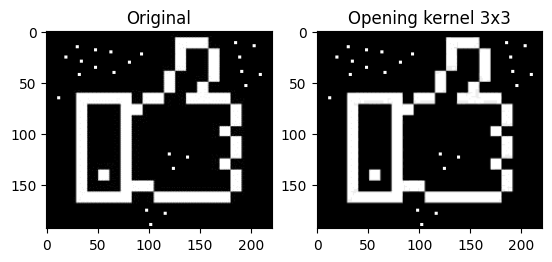

In [7]:
img_ok = cv2.imread('Images/ok.png', 1)
kernel3x3 = np.ones((3,3),np.uint8)

opening3x3 = cv2.morphologyEx(img_ok, cv2.MORPH_OPEN, kernel3x3)

plt.subplot(121),plt.imshow(img_ok),plt.title('Original')
plt.subplot(122),plt.imshow(opening3x3),plt.title('Opening kernel 3x3')


Cuando se aplica un kernel de 12x12 se llega al punto que se empiza a afectar la forma de la imagen.

(<Axes: title={'center': 'Opening 12x12'}>,
 Text(0.5, 1.0, 'Opening 12x12'))

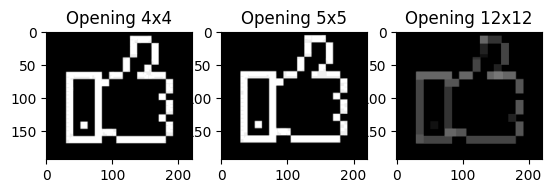

In [8]:
kernel4x4 = np.ones((4,4),np.uint8)
kernel5x5 = np.ones((5,5),np.uint8)
kernel12x12 = np.ones((12,12),np.uint8)

opening4x4 = cv2.morphologyEx(img_ok, cv2.MORPH_OPEN, kernel4x4)
opening5x5 = cv2.morphologyEx(img_ok, cv2.MORPH_OPEN, kernel5x5)
opening6x6 = cv2.morphologyEx(img_ok, cv2.MORPH_OPEN, kernel12x12)

plt.subplot(131),plt.imshow(opening4x4),plt.title('Opening 4x4')
plt.subplot(132),plt.imshow(opening5x5),plt.title('Opening 5x5')
plt.subplot(133),plt.imshow(opening6x6),plt.title('Opening 12x12')

# **Actividad 3b. Closing**

Closing realiza una Dilatación de imagen para aplicar la operación de Erosión posteriormente.

Closing sirve para rellenar huegos en una imagen conservadno la silueta y el tamaño.

Puede ser utilizado para quitar el ruido "pepper" de la imagen.

In [9]:
def CloseImage(imagen,dimension):
  img = cv2.imread(imagen,cv2.IMREAD_GRAYSCALE)
  assert img is not None, "No se encontró la imagen señalada."

  fig0, ((ax0,ax1) ) = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
  ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  ax0.set_title('Imagen original')
  ax0.axis('off')

  kernel = np.ones((dimension,dimension),np.uint8)
  imgClose = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)


  ax1.imshow(cv2.cvtColor(imgClose, cv2.COLOR_BGR2RGB))
  ax1.set_title('Imagen Closing. Kernel ' + str(dimension) + ' x ' + str(dimension))
  ax1.axis('off')

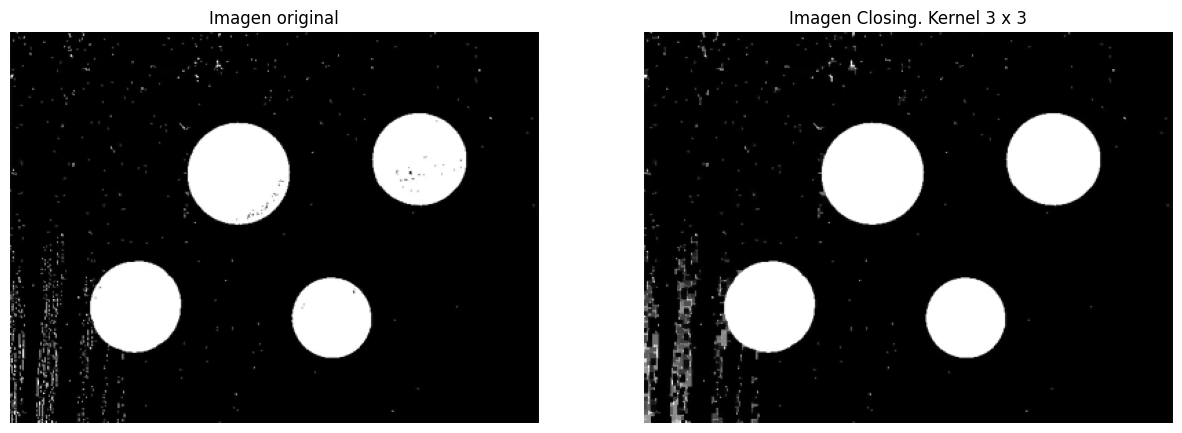

In [10]:
CloseImage('Images/esferas.png',3)

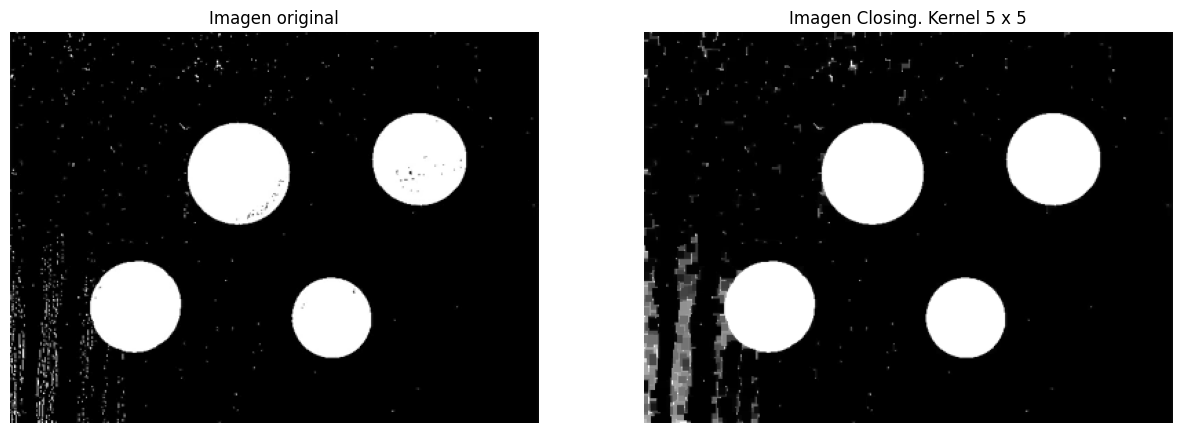

In [11]:
CloseImage('Images/esferas.png',5)

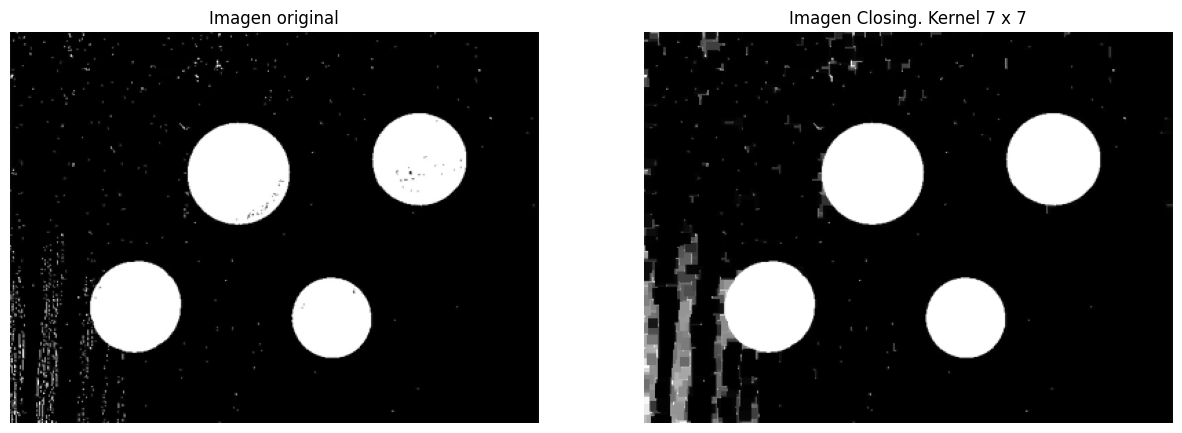

In [12]:
CloseImage('Images/esferas.png',7)

# **Bibliografia**

[1] Gonzalez, R. C., & Woods, R. E. (2017). Digital Image Processing, Global Edition. Pearson Higher Education.

[2] Ren, J., & Liu, X. (2015). On vectorization of deep convolutional neural networks for vision tasks. Proceedings of the . . . AAAI Conference on Artificial Intelligence, 29(1). https://doi.org/10.1609/aaai.v29i1.9488

[3] Tipos de operaciones morfológicas (nd). Recuperado febrero 3, 2024, de https://la.mathworks.com/help/images/morphological-dilation-and-erosion.html

[4] Closing (nd). Recuperado febrero 3, 2024, de https://homepages.inf.ed.ac.uk/rbf/HIPR2/close.htm

[5] Morphological Transformations (nd). Recuperado febrero 3, 2024, de https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

[6]Image Processing: Morphological Operations with Python, Recuperado febrero 3, 2024, de https://pub.towardsai.net/image-processing-morphological-operations-with-python-7e0f8d1983eb

[7]Apply Morphological Gradient Operation to an Image using OpenCV, Recuperado febrero 3, 2024, de https://lindevs.com/apply-morphological-gradient-operation-to-an-image-using-opencv

[8]Morphological Transformations of Images using OpenCV | Image Processing Part-2, Recuperado febrero 3, 2024, de https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38

[9]Morphological Transformations, Recuperado febrero 3, 2024, de https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html
